# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [3]:
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [5]:
# Crypto API URLs
btc_api_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_api_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"



In [6]:
# Fetch current BTC price
bitcoin_request=requests.get(btc_api_url).json()
bitcoin_price=bitcoin_request['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
ethereum_request=requests.get(eth_api_url).json()
ethereum_price=ethereum_request['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
bitcoin_portfolio_value=my_btc*bitcoin_price
ethereum_portfolio_value=my_eth*ethereum_price

# Print current crypto wallet balance
print(f"My Bitcoin Portfolio Value ${bitcoin_portfolio_value}")
print(f"My Ethereum Portfolio Value ${ethereum_portfolio_value}")





My Bitcoin Portfolio Value $61867.2
My Ethereum Portfolio Value $15793.417


In [7]:
# Fetch current BTC price
bitcoin_request=requests.get(btc_api_url).json()
bitcoin_price=bitcoin_request['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
ethereum_request=requests.get(eth_api_url).json()
ethereum_price=ethereum_request['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
bitcoin_portfolio_value=my_btc*bitcoin_price
ethereum_portfolio_value=my_eth*ethereum_price

# Print current crypto wallet balance
print(f"My Bitcoin Portfolio Value ${bitcoin_portfolio_value}")
print(f"My Ethereum Portfolio Value ${ethereum_portfolio_value}")





My Bitcoin Portfolio Value $61867.2
My Ethereum Portfolio Value $15793.417


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [10]:
# Format current date as ISO format
today = pd.Timestamp("2024-02-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio=alpaca.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG=df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol',axis=1)
SPY=df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol',axis=1)                


# # Concatenate the ticker DataFrames
df_portfolio=pd.concat([AGG,SPY],axis=1,keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                             \
                           close    high    low trade_count   open   volume   
timestamp                                                                     
2024-02-14 05:00:00+00:00  97.18  97.215  96.84       32397  96.84  8776901   

                                         SPY                             \
                                vwap   close    high    low trade_count   
timestamp                                                                 
2024-02-14 05:00:00+00:00  97.108151  498.57  499.07  494.4      536843   

                                                         
                             open    volume        vwap  
timestamp                                                
2024-02-14 05:00:00+00:00  496.79  68387827  496.719466

In [11]:
# Pick AGG and SPY close prices
agg_close_price=float(df_portfolio['AGG']['close'])
spy_close_price=float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.18
Current SPY closing price: $498.57


C:\Users\jagui\AppData\Local\Temp\ipykernel_50136\3275794863.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price=float(df_portfolio['AGG']['close'])
C:\Users\jagui\AppData\Local\Temp\ipykernel_50136\3275794863.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price=float(df_portfolio['SPY']['close'])


In [12]:
# Compute the current value of shares
my_agg_value=my_agg*agg_close_price
my_spy_value=my_spy*spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is: ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is: ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is: $24928.50
The current value of your 200 AGG shares is: $19436.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income=12000

# # Consolidate financial assets data
my_crypto_value=bitcoin_portfolio_value+ethereum_portfolio_value
my_shares_value=my_agg_value+my_spy_value

consol_assets={
    'amount':[my_crypto_value, my_shares_value]

}


# # Create savings DataFrame
df_savings = pd.DataFrame(consol_assets,index=['crypto', 'shares'])

# # Display savings DataFrame
df_savings

,amount
crypto,77660.617
shares,44364.500


<Axes: ylabel='amount'>

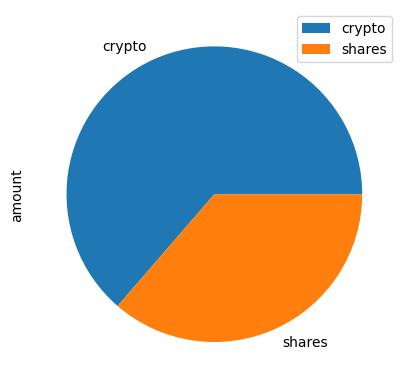

In [25]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')
    

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Congratulating!  You are on track with your financial goal.')
elif total_savings < emergency_fund:
    print(f'You are ${emergency_fund - total_savings} away from you goal')


Congratulations! You have enough money in your emergency fund.


C:\Users\jagui\AppData\Local\Temp\ipykernel_50136\669308195.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  total_savings = float(df_savings.sum())


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.

start_date=pd.Timestamp("2019-02-14", tz="America/New_York").isoformat()
end_date=today


In [17]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG=df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)
SPY=df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis=1)    


# Concatenate the ticker DataFrames
df_stock_data=pd.concat([AGG,SPY],axis=1,keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2019-02-14 05:00:00+00:00  107.22  107.35  107.1700       12486  107.33   
2019-02-15 05:00:00+00:00  107.30  107.31  107.1900       10422  107.25   
2019-02-19 05:00:00+00:00  107.36  107.45  107.2800       13903  107.43   
2019-02-20 05:00:00+00:00  107.37  107.39  107.2843       11863  107.37   
2019-02-21 05:00:00+00:00  107.13  107.18  107.1000       11803  107.16   

                                                   SPY                   \
                            volume        vwap   close    high      low   
timestamp                                                                 
2019-02-14 05:00:00+00:00  3081841  107.230875  274.46  275.64  272.870   
2019-02-15 05:00:00+00:00  2709313  107.283078  277.38  277.41  276.130   
2019-02-19 05:00:00+00:00  6470343  107.352474  277.88  278.58  276.470   
2019-02-20 05:00:00+00:00  3579496  107.344759  278.43  278.92  277.250   
2019-02-21 05:00:00+00:00  3898093  107.139647  277.46  278.10  276.345   

                                                                       
                          trade_count      open    volume        vwap  
timestamp                                                              
2019-02-14 05:00:00+00:00      395160  273.7800  84116124  274.380189  
2019-02-15 05:00:00+00:00      367592  276.3600  98445574  276.676365  
2019-02-19 05:00:00+00:00      237890  276.4813  60016568  277.757532  
2019-02-20 05:00:00+00:00      326117  277.8100  77459348  278.158744  
2019-02-21 05:00:00+00:00      299168  277.7000  64937725  277.333262

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!


MC_retirement_plan = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_retirement_plan.portfolio_data.head()

AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2019-02-14 05:00:00+00:00  107.22  107.35  107.1700       12486  107.33   
2019-02-15 05:00:00+00:00  107.30  107.31  107.1900       10422  107.25   
2019-02-19 05:00:00+00:00  107.36  107.45  107.2800       13903  107.43   
2019-02-20 05:00:00+00:00  107.37  107.39  107.2843       11863  107.37   
2019-02-21 05:00:00+00:00  107.13  107.18  107.1000       11803  107.16   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2019-02-14 05:00:00+00:00  3081841  107.230875          NaN  274.46  275.64   
2019-02-15 05:00:00+00:00  2709313  107.283078     0.000746  277.38  277.41   
2019-02-19 05:00:00+00:00  6470343  107.352474     0.000559  277.88  278.58   
2019-02-20 05:00:00+00:00  3579496  107.344759     0.000093  278.43  278.92   
2019-02-21 05:00:00+00:00  3898093  107.139647    -0.002235  277.46  278.10   

                                                                    \
                               low trade_count      open    volume   
timestamp                                                            
2019-02-14 05:00:00+00:00  272.870      395160  273.7800  84116124   
2019-02-15 05:00:00+00:00  276.130      367592  276.3600  98445574   
2019-02-19 05:00:00+00:00  276.470      237890  276.4813  60016568   
2019-02-20 05:00:00+00:00  277.250      326117  277.8100  77459348   
2019-02-21 05:00:00+00:00  276.345      299168  277.7000  64937725   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-02-14 05:00:00+00:00  274.380189          NaN  
2019-02-15 05:00:00+00:00  276.676365     0.010639  
2019-02-19 05:00:00+00:00  277.757532     0.001803  
2019-02-20 05:00:00+00:00  278.158744     0.001979  
2019-02-21 05:00:00+00:00  277.333262    -0.003484

In [20]:
    # Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_retirement_plan.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.


c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homework assignment - starter code\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homework assignment - starter code\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homew

Running Monte Carlo simulation number 200.


c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homework assignment - starter code\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homework assignment - starter code\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homew

Running Monte Carlo simulation number 300.


c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homework assignment - starter code\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homework assignment - starter code\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homew

Running Monte Carlo simulation number 400.


c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homework assignment - starter code\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homework assignment - starter code\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\jagui\OneDrive\Desktop\Assignments\Module 5 homew

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999948,1.010712,1.011945,1.001660,1.008932,0.998118,0.996786,0.991646,1.005269,0.992179,...,0.992464,1.002707,1.009840,0.993426,1.011811,0.999144,1.000679,1.004267,1.010867,1.001018
2,0.987090,1.013030,1.006909,1.011250,0.999959,0.988261,1.001048,0.988173,0.999710,0.984622,...,0.992649,0.997272,1.011831,1.000849,1.021468,0.991582,0.993691,1.003376,0.998968,0.995434
3,0.992237,1.002186,1.015955,1.001269,1.004018,0.986773,1.018206,0.996579,0.993115,0.990527,...,0.988355,0.998387,1.005708,1.000518,1.026158,0.988752,0.991004,0.997031,0.994018,0.990068
4,1.008442,0.993426,1.018717,1.018773,1.000648,0.993363,1.018622,0.992798,1.000250,0.987201,...,0.987392,0.998877,1.004772,0.999029,1.022360,1.003806,0.990801,0.988750,0.991809,0.985090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.243613,23.604084,3.582993,11.543632,3.415802,8.265251,35.909860,6.014745,6.042860,5.602938,...,10.992273,10.075846,14.013718,6.998113,6.018200,6.702456,14.472652,7.862814,14.795808,8.026501
7557,5.254259,23.859355,3.593819,11.540218,3.406971,8.342074,35.772304,5.979809,6.028627,5.595590,...,11.067148,10.128405,14.150486,6.971687,5.982301,6.639818,14.280360,7.895770,14.792225,8.054272
7558,5.217399,23.668258,3.579215,11.431583,3.411243,8.427774,35.964651,5.972299,6.046574,5.598575,...,11.201383,10.118210,14.125279,7.036077,5.996050,6.700906,14.245543,7.996141,14.896551,8.112343
7559,5.266325,23.892987,3.566322,11.499175,3.392190,8.410663,36.551657,5.943917,6.086826,5.639412,...,11.167059,10.222130,14.022745,7.051237,5.970216,6.741515,14.394160,7.939784,14.856965,8.149376


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

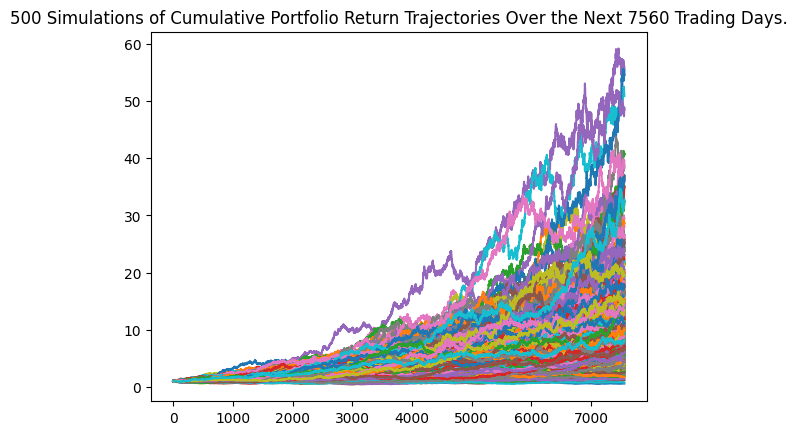

In [26]:
# Plot simulation outcomes
MC_retirement_plan.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

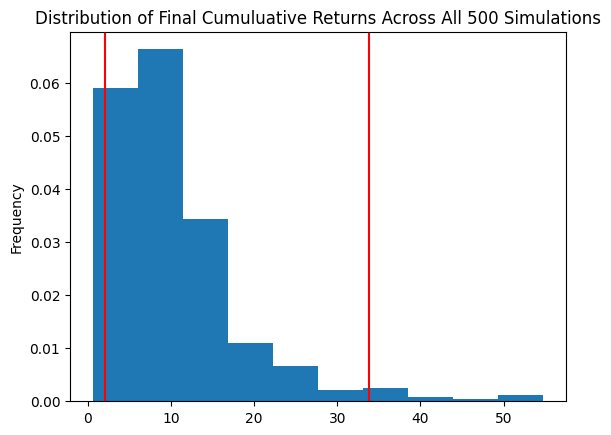

In [27]:
# Plot probability distribution and confidence intervals
MC_retirement_plan.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=MC_retirement_plan.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             10.343662
std               7.930470
min               0.589570
25%               5.272130
50%               8.259716
75%              13.048027
max              54.796229
95% CI Lower      2.107788
95% CI Upper     33.869936
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $42155.76 and $677398.72


C:\Users\jagui\AppData\Local\Temp\ipykernel_50136\3610877882.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower=round(tbl[8]*initial_investment,2)
C:\Users\jagui\AppData\Local\Temp\ipykernel_50136\3610877882.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper=round(tbl[9]*initial_investment,2)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $63233.64 and $1016098.09


C:\Users\jagui\AppData\Local\Temp\ipykernel_50136\2410892881.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower=round(tbl[8]*initial_investment,2)
C:\Users\jagui\AppData\Local\Temp\ipykernel_50136\2410892881.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper=round(tbl[9]*initial_investment,2)


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")